<a href="https://colab.research.google.com/github/Cehiim/boilerplate-medical-data-visualizer/blob/main/Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [190]:
!git clone https://github.com/Cehiim/boilerplate-medical-data-visualizer.git

fatal: destination path 'boilerplate-medical-data-visualizer' already exists and is not an empty directory.


In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Questions

## 1

In [238]:
df = pd.read_csv("boilerplate-medical-data-visualizer/medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 2

In [239]:
df.loc[df['weight'] / (df['height'] / 100) ** 2 > 25, 'overweight'] = 1
df.loc[~(df['weight'] / (df['height'] / 100) ** 2 > 25), 'overweight'] = 0
df['overweight'].value_counts()

,count
overweight,
1.0,43546
0.0,26454


## 3

In [240]:
df['cholesterol'] = df.apply(lambda x: 1 if x['cholesterol'] > 1 else 0, axis=1)
df['cholesterol'].value_counts()

,count
cholesterol,
0,52385
1,17615


In [241]:
df['gluc'] = (df['gluc'] > 1).astype(int)
df['gluc'].value_counts()

,count
gluc,
0,59479
1,10521


## 4/5

In [242]:
df_cat = pd.melt(
    df,
    id_vars = ['id', 'cardio'],
    value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat

,id,cardio,variable,value
0,0,0,cholesterol,0.0
1,1,1,cholesterol,1.0
2,2,1,cholesterol,1.0
3,3,1,cholesterol,0.0
4,4,0,cholesterol,0.0
...,...,...,...,...
419995,99993,0,overweight,1.0
419996,99995,1,overweight,1.0
419997,99996,1,overweight,1.0
419998,99998,1,overweight,1.0


## 6

In [243]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')
df_cat

,cardio,variable,value,count
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


## 7/8

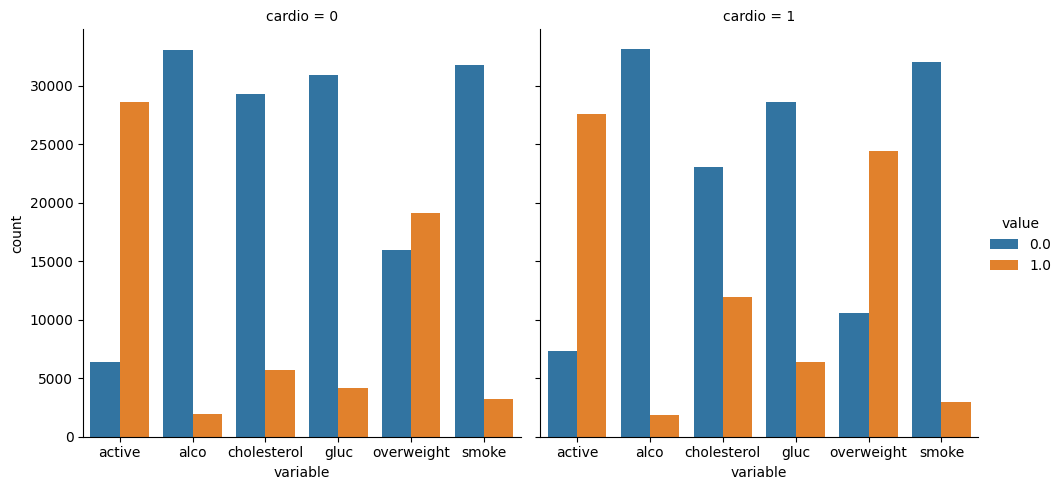

In [244]:
chart = sns.catplot(data=df_cat, kind="bar", x="variable", y="count", hue="value", col="cardio")
fig = chart

## 9

In [245]:
fig.savefig('catplot.png')

## 10/11

In [246]:
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi']) &
                  (df['height'] >= df['height'].quantile(0.025)) &
                  (df['height'] <= df['height'].quantile(0.975)) &
                  (df['weight'] >= df['weight'].quantile(0.025)) &
                  (df['weight'] <= df['weight'].quantile(0.975))]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


## 12

In [247]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


## 13

In [248]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

## 14

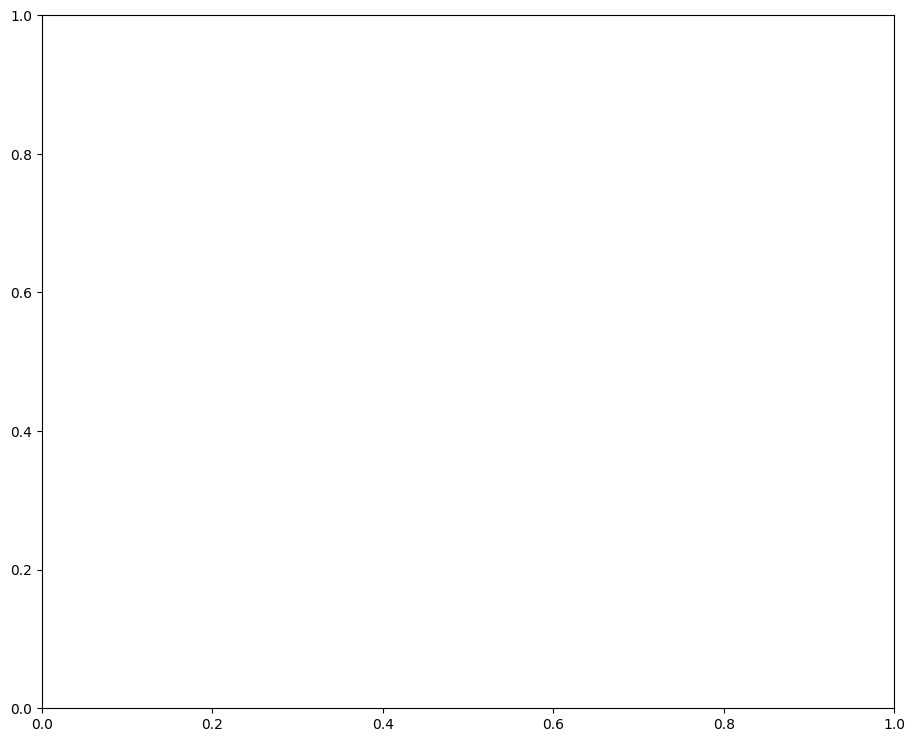

In [249]:
fig, ax = plt.subplots(figsize=(11, 9))

## 15

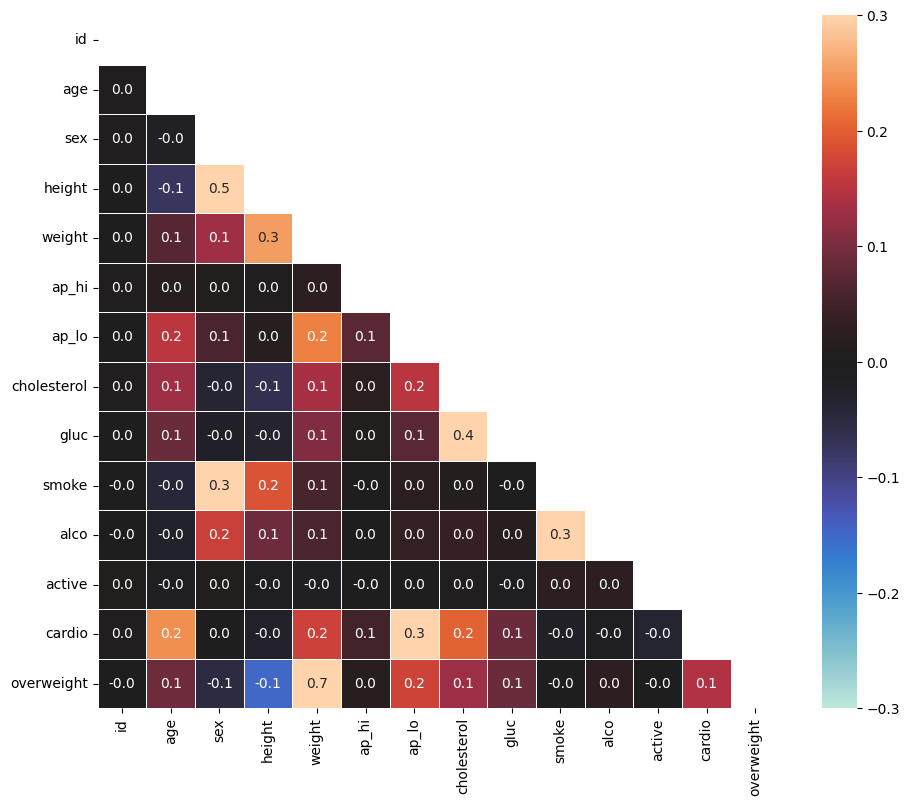

In [250]:
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt="0.1f", ax=ax, cmap='icefire', vmin=-0.3, vmax=0.3)
fig

## 16

In [251]:
fig.savefig('heatmap.png')